In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
sys.path.insert(1, "../")
from utils import topoPlotIndie

In [2]:
data = scipy.io.loadmat("..\data\\restingstate64chans.mat")

dataR = data['EEG']['data'][0][0]
srate =int(data["EEG"]["srate"])
npnts = dataR.shape[1]

chanpowr = (2*abs(scipy.fft.fft(dataR, axis=1)/npnts))**2
chanpowr = np.mean(chanpowr, axis=2)

hz = np.linspace(0, srate/2, npnts//2)

C:\Users\kerem\AppData\Local\Temp\ipykernel_8132\4118129796.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  srate =int(data["EEG"]["srate"])


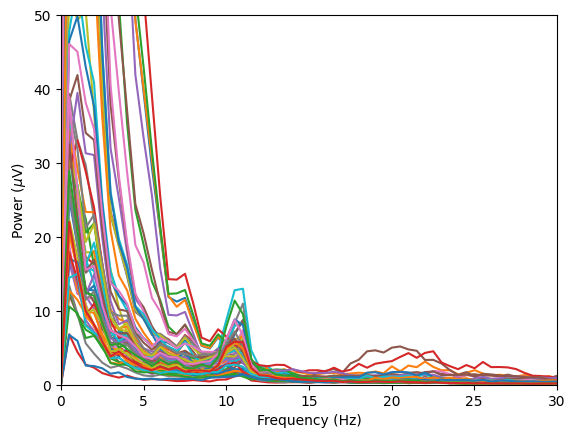

In [3]:
plt.plot(hz, chanpowr[:,:len(hz)].T)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power ($\mu$V)")
plt.xlim([0,30])
plt.ylim([0,50])
plt.show()

In [4]:
alphabounds = np.array([8, 12])

freqidx = [np.argmin(abs(hz - bound)) for bound in alphabounds]

alphapower = np.mean(chanpowr[:,freqidx[0]:freqidx[1]], axis=1)

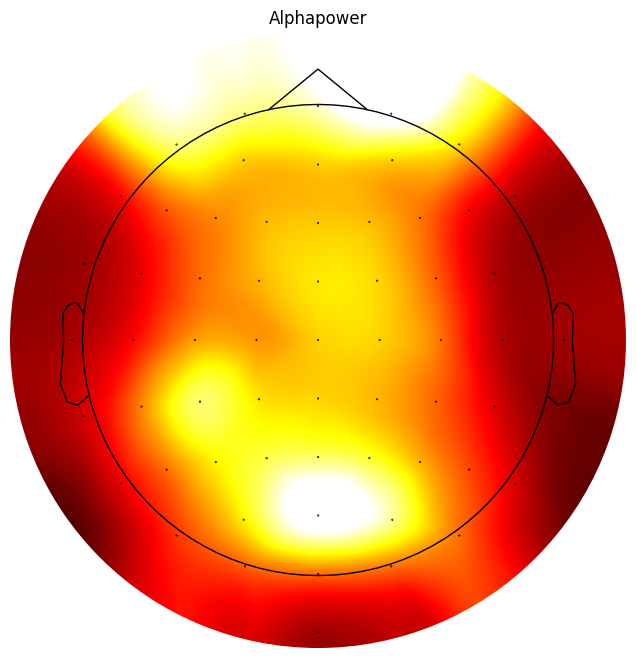

In [5]:
fig, ax = plt.subplots( 1, 1, figsize=(10, 8))
topoPlotIndie(data['EEG'],  alphapower, ax=ax, title="Alphapower", vlim=(0,6), cmap="hot", contours=0)